In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
% matplotlib inline

# 节点数&边数

节点数：105
边数：262


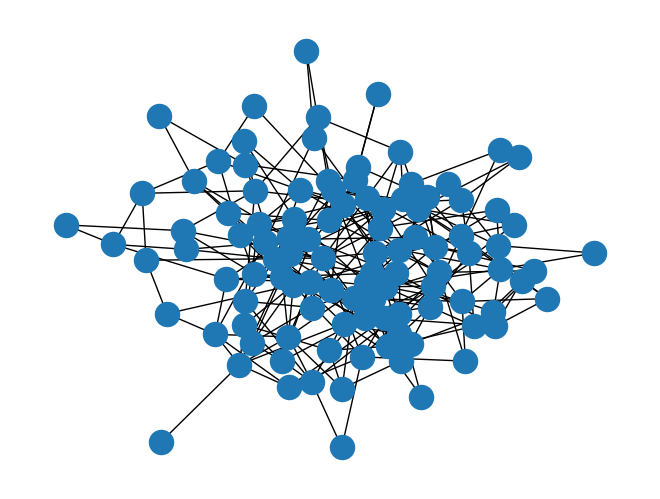

In [168]:
# 读入邻接表
data = pd.read_csv('E:\TangDoc\网络科学\大作业\测试数据\data9.csv', header=None)
adj_list = data.to_numpy()
adj_list = [(pair[0], pair[1]) for pair in adj_list]

# 由邻接表构图
g_data = nx.Graph(adj_list)
# 得到节点数，边数
num_nodes = g_data.number_of_nodes()
num_edges = g_data.number_of_edges()
print(f'节点数：{num_nodes}')
print(f'边数：{num_edges}')
nx.draw(g_data)



In [174]:
g_data.degree

DegreeView({0: 1, 88: 7, 1: 2, 44: 5, 45: 5, 2: 2, 82: 7, 28: 4, 3: 2, 43: 4, 101: 9, 4: 2, 56: 5, 97: 8, 5: 2, 90: 7, 78: 6, 6: 2, 12: 3, 30: 4, 7: 2, 36: 4, 86: 7, 8: 2, 16: 3, 51: 5, 9: 2, 37: 4, 38: 4, 10: 2, 92: 7, 29: 4, 11: 3, 80: 6, 102: 9, 93: 8, 13: 3, 65: 5, 75: 6, 62: 5, 14: 3, 17: 3, 34: 4, 100: 9, 15: 3, 60: 5, 103: 9, 41: 4, 70: 6, 77: 6, 85: 7, 18: 3, 95: 8, 87: 7, 19: 3, 79: 6, 20: 3, 69: 6, 23: 3, 21: 3, 22: 3, 98: 9, 83: 7, 94: 8, 24: 3, 52: 5, 25: 4, 81: 7, 26: 4, 72: 6, 54: 5, 71: 6, 27: 4, 66: 5, 76: 6, 96: 8, 55: 5, 74: 6, 31: 4, 32: 4, 33: 4, 91: 7, 58: 5, 67: 5, 68: 5, 35: 4, 48: 5, 89: 7, 59: 5, 73: 6, 61: 5, 104: 10, 39: 4, 47: 5, 40: 4, 84: 7, 42: 4, 63: 5, 99: 9, 53: 5, 64: 5, 46: 5, 57: 5, 49: 5, 50: 5})

# 平均度&度分布

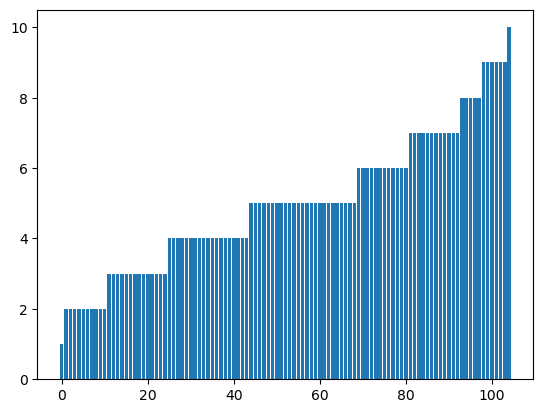

Avg Degree: 4.9904761904761905
Degree Hist: [0, 1, 10, 14, 19, 25, 12, 12, 5, 6, 1]


In [13]:

degree_list = list(g_data.degree())
sorted_data = sorted(degree_list, key=lambda x: x[0])

draw_x = [pair[0] for pair in sorted_data]
draw_y = [pair[1] for pair in sorted_data]

plt.bar(draw_x, draw_y)
plt.show()

avg_degree = np.sum(draw_y) / num_nodes
print(f'Avg Degree: {avg_degree}')

degree_hist = nx.degree_histogram(g_data)
print(f'Degree Hist: {degree_hist}')

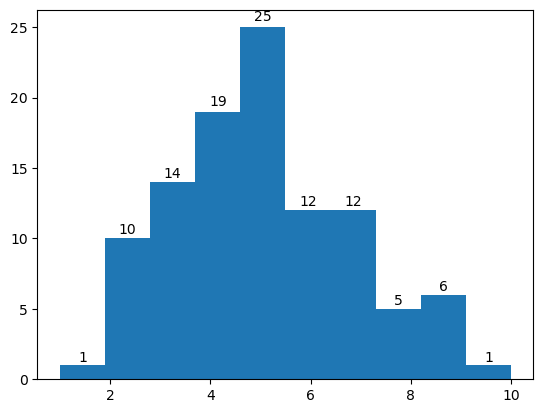

[ 1. 10. 14. 19. 25. 12. 12.  5.  6.  1.]


In [14]:
# 验证度分布
n, bins, patches = plt.hist(draw_y, bins=10)
for i in range(len(n)):
    plt.text(bins[i] + (bins[1] - bins[0]) / 2, n[i] * 1.01, int(n[i]), ha='center', va='bottom')
plt.show()
print(patches.datavalues)

# 余平均度、余度分布

Avg Remain Degree: 5.712842025699169


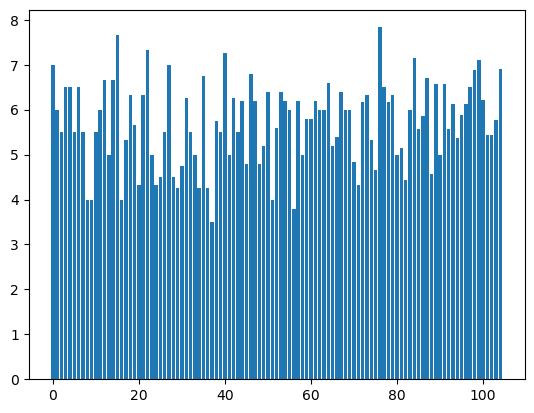

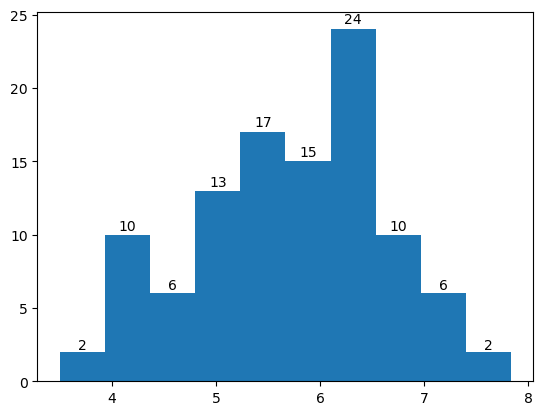

Hist Remain Degree: [ 2. 10.  6. 13. 17. 15. 24. 10.  6.  2.]
[(6.0, 8), (5.5, 8), (5.0, 7), (6.2, 5), (6.5, 5), (4.0, 4), (6.333333333333333, 4), (4.25, 3), (4.333333333333333, 3), (6.4, 3), (7.0, 2), (4.8, 2), (4.5, 2), (5.444444444444445, 2), (6.166666666666667, 2), (6.666666666666667, 2), (5.571428571428571, 2), (6.125, 2), (5.2, 2), (5.333333333333333, 2), (5.8, 2), (6.25, 2), (6.571428571428571, 2), (4.571428571428571, 1), (4.428571428571429, 1), (3.8, 1), (4.75, 1), (5.857142857142857, 1), (3.5, 1), (5.75, 1), (4.666666666666667, 1), (6.222222222222222, 1), (7.666666666666667, 1), (5.777777777777778, 1), (4.833333333333333, 1), (5.875, 1), (6.714285714285714, 1), (5.666666666666667, 1), (7.333333333333333, 1), (6.888888888888889, 1), (5.375, 1), (5.6, 1), (5.142857142857143, 1), (5.4, 1), (7.833333333333333, 1), (6.75, 1), (6.9, 1), (7.25, 1), (7.142857142857143, 1), (7.111111111111111, 1), (6.6, 1), (6.8, 1)]


In [80]:
degree_list = [pair[1] for pair in sorted_data]

remian_deg_list = []
for i in g_data.nodes:
    remain_degs = 0
    for j in g_data.neighbors(i):
        remain_degs += g_data.degree(j)
    remain_deg_i = remain_degs / g_data.degree(i)
    remian_deg_list.append((i, remain_deg_i))

rmain_deg_draw_x = [pair[0] for pair in remian_deg_list]
rmain_deg_draw_y = [pair[1] for pair in remian_deg_list]
avg_remain_degree = np.sum(rmain_deg_draw_y) / num_nodes
print(f'Avg Remain Degree: {avg_remain_degree}')


plt.bar(rmain_deg_draw_x, rmain_deg_draw_y)
plt.show()

# 验证度分布
n, bins, patches = plt.hist(rmain_deg_draw_y, bins=10)
for i in range(len(n)):
    plt.text(bins[i] + (bins[1] - bins[0]) / 2, n[i] * 1.01, int(n[i]), ha='center', va='bottom')
plt.show()
print(f'Hist Remain Degree: {patches.datavalues}')

counter = Counter(rmain_deg_draw_y)
count_pairs = counter.most_common()
print(count_pairs)

In [187]:


# 余度分布
deg_dic = {}
for pair in g_data.edges:
    i = pair[0]
    j = pair[1]
    deg_i = degree_list[i]
    deg_j = degree_list[j]
    # 累加尾节点度数出现的次数
    deg_dic[deg_i] = deg_dic.get(deg_i, 0) + 1
    deg_dic[deg_j] = deg_dic.get(deg_j, 0) + 1

print(deg_dic)
print(np.array([item[1] for item in deg_dic.items()]) / (2*num_edges))




{1: 1, 7: 84, 4: 76, 5: 125, 6: 72, 9: 54, 2: 20, 3: 42, 8: 40, 10: 10}
[0.0019084  0.16030534 0.14503817 0.23854962 0.13740458 0.10305344
 0.03816794 0.08015267 0.07633588 0.01908397]


# 平均路径&聚类系数

In [33]:
# 计算平均路径和聚类系数
avg_path_length = nx.average_shortest_path_length(g_data)
avg_clustering_coefficient = nx.average_clustering(g_data)
print(f'平均路径长度：{avg_path_length}')
print(f'聚类系数：{avg_clustering_coefficient}')

平均路径长度：3.049267399267399
聚类系数：0.04002267573696145


# 网络统计函数

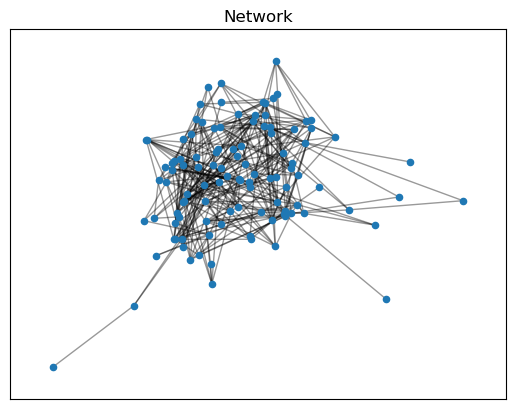

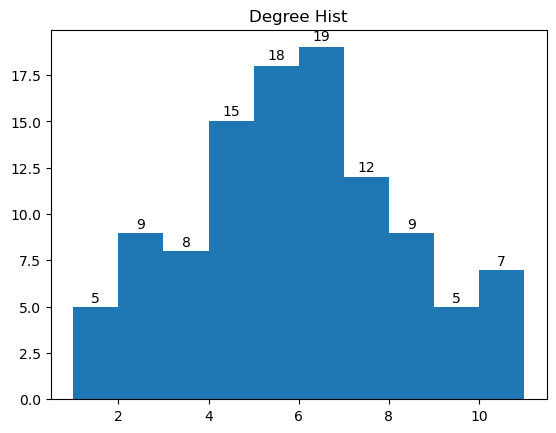

rDeg: [(3.0, 2), (3.5, 2), (4.0, 1), (4.333333333333333, 1), (4.4, 1), (4.666666666666667, 2), (5.0, 1), (5.25, 2), (5.333333333333333, 3), (5.4, 1), (5.428571428571429, 1), (5.5, 3), (5.666666666666667, 1), (5.7272727272727275, 1), (5.8, 2), (5.875, 1), (6.0, 11), (6.166666666666667, 1), (6.2, 4), (6.222222222222222, 2), (6.25, 2), (6.285714285714286, 1), (6.333333333333333, 1), (6.4, 2), (6.444444444444445, 1), (6.5, 3), (6.6, 2), (6.625, 2), (6.666666666666667, 6), (6.714285714285714, 2), (6.777777777777778, 1), (6.8, 1), (6.857142857142857, 2), (7.0, 9), (7.1, 2), (7.125, 1), (7.142857142857143, 1), (7.2, 2), (7.25, 1), (7.333333333333333, 1), (7.375, 2), (7.4, 1), (7.428571428571429, 1), (7.5, 2), (7.571428571428571, 1), (7.6, 1), (7.666666666666667, 3), (7.75, 1), (7.833333333333333, 1), (8.0, 4), (8.333333333333334, 1), (8.5, 2), (8.8, 1)]


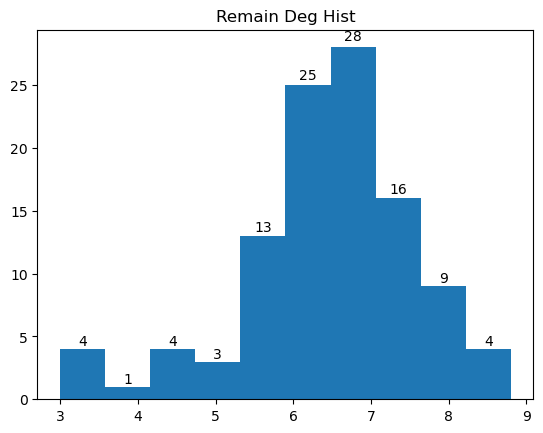

{5: 90, 7: 84, 8: 72, 6: 114, 4: 60, 11: 22, 10: 50, 9: 45, 3: 24, 1: 5, 2: 18}
节点数: 107
边数: 292
平均度: 5.457943925233645
度分布: [0, 5, 9, 8, 15, 18, 19, 12, 9, 5, 5, 2]
余平均度: 6.431096006796943
余度分布: [ 4.  1.  4.  3. 13. 25. 28. 16.  9.  4.]
yu_hist0余度分布: [ 90  84  72 114  60  22  50  45  24   5  18]
yu_hist余度分布: [0.15410959 0.14383562 0.12328767 0.19520548 0.10273973 0.03767123
 0.08561644 0.07705479 0.04109589 0.00856164 0.03082192]
平均路径: 2.9358137894551226
聚类系数: 0.057875820959933114


In [233]:

'''
    统计Graph.Data中的各个属性
    输入：nx.Graph
    输出：节点数、边数、平均度、度分布、余平均度、余度分布、平均路径和聚类系数
'''


def statistic_graph(g_data):
    # 统计节点数和边数
    # nx.draw(g_data)
    pos = nx.spring_layout(g_data, k=0.001, seed=0)
    nx.draw_networkx_nodes(g_data, pos, node_size=20)
    nx.draw_networkx_edges(g_data, pos, alpha=0.4)
    plt.title('Network')
    plt.show()
    num_nodes = g_data.number_of_nodes()
    num_edges = g_data.number_of_edges()

    degree_list = list(g_data.degree())
    sorted_data = sorted(degree_list, key=lambda x: x[0])
    draw_y = [pair[1] for pair in sorted_data]

    # 计算平均度和度分布
    avg_degree = np.sum(draw_y) / num_nodes
    degree_hist = nx.degree_histogram(g_data)

    n, bins, patches = plt.hist(draw_y, bins=10)
    for i in range(len(n)):
        plt.text(bins[i] + (bins[1] - bins[0]) / 2, n[i] * 1.01, int(n[i]), ha='center', va='bottom')
    plt.title('Degree Hist')
    plt.show()

    # 计算余平均度和余度分布
    remian_deg_list = []
    for i in g_data.nodes:
        remain_degs = 0
        for j in g_data.neighbors(i):
            remain_degs += g_data.degree(j)
        remain_deg_i = remain_degs / g_data.degree(i)
        remian_deg_list.append(remain_deg_i)
    avg_degree_remainder = np.sum(remian_deg_list) / num_nodes


    rdeg_dic = {}
    for i in remian_deg_list:
        rdeg_dic[i] = rdeg_dic.get(i, 0) + 1
    rdeg_dic = sorted(rdeg_dic.items(), key=lambda x: x[0])
    print(f'rDeg: {rdeg_dic}')

    n, bins, patches = plt.hist(remian_deg_list, bins=10)
    for i in range(len(n)):
        plt.text(bins[i] + (bins[1] - bins[0]) / 2, n[i] * 1.01, int(n[i]), ha='center', va='bottom')
    plt.title('Remain Deg Hist')
    plt.show()
    degree_remainder_hist = patches.datavalues

    # 余度分布
    deg_dic = {}
    for pair in g_data.edges:
        i = pair[0]
        j = pair[1]
        deg_i = draw_y[i]
        deg_j = draw_y[j]
        # 累加尾节点度数出现的次数
        deg_dic[deg_i] = deg_dic.get(deg_i, 0) + 1
        deg_dic[deg_j] = deg_dic.get(deg_j, 0) + 1
    print(deg_dic)
    yu_hist0 = np.array([item[1] for item in deg_dic.items()])
    yu_hist = np.array([item[1] for item in deg_dic.items()]) / (2*num_edges)

    # 计算平均路径和聚类系数
    avg_path_length = nx.average_shortest_path_length(g_data)
    if g_data.is_multigraph():
        avg_clustering_coefficient = -1
    else:
        avg_clustering_coefficient = nx.average_clustering(g_data)

    # 打印统计结果
    print("节点数:", num_nodes)
    print("边数:", num_edges)
    print("平均度:", avg_degree)
    print("度分布:", degree_hist)
    print("余平均度:", avg_degree_remainder)
    print("余度分布:", degree_remainder_hist)
    print("yu_hist0余度分布:", yu_hist0)
    print("yu_hist余度分布:", yu_hist)
    print("平均路径:", avg_path_length)
    print("聚类系数:", avg_clustering_coefficient)


statistic_graph(g_data)

# 零模型Code

In [197]:

# 生成0阶零模型
def generate_null_model_0(n, m):
    return nx.gnm_random_graph(n, m)


def _generate_null_model_0(n, m):
    g_0 = nx.Graph()

    node_list = range(n)
    g_0.add_nodes_from(node_list)

    count_edge = 0
    while count_edge < m:
        i, j = list(np.random.choice(node_list, size=2, replace=False))
        if g_0.has_edge(i, j) or g_0.has_edge(j, i):
            continue
        else:
            count_edge += 1
            g_0.add_edge(i, j)

    return g_0


# 生成1阶零模型
def generate_null_model_1(degree_seq):
    g_1 = nx.configuration_model(degree_seq)
    return g_1


# 基于断边重连生成1阶级零模型
def generate_null_model_1_reconnect(graph, nswap=10, max_tries=200):
    g_1 = nx.double_edge_swap(graph, nswap=nswap, max_tries=max_tries)
    return g_1


# 自己实现的通过断开重连生成1阶零模型
def _generate_null_model_1_recon(graph, nswap=10, max_try=100):
    node_list = list(graph.nodes)

    swap_count = 0
    try_count = 0
    while swap_count < nswap and try_count < max_try:
        try_count += 1
        # 随机选择两个起始节点
        i_1, i_2 = list(np.random.choice(node_list, size=2, replace=False))
        # 从i的adj随机选择一个尾节点
        j_1 = np.random.choice(list(graph.adj[i_1]))
        j_2 = np.random.choice(list(graph.adj[i_2]))

        if i_1 > j_1:
            t = i_1
            i_1 = j_1
            j_1 = t

        if i_2 > j_2:
            t = i_2
            i_2 = j_2
            j_2 = t

        if j_1 == j_2 or graph.has_edge(i_1, i_2) or graph.has_edge(j_1, j_2) or graph.has_edge(i_2,
                                                                                                   i_1) or graph.has_edge(
            j_2, j_1) or graph.has_edge(i_1, j_2) or graph.has_edge(i_2, j_1) or graph.has_edge(j_2,
                                                                                                   i_1) or graph.has_edge(
            j_1, i_2):
            continue
        swap_count += 1
        # 交换两条边
        graph.add_edges_from([(i_1, j_2), (i_2, j_1)])
        graph.remove_edges_from([(i_1, j_1), (i_2, j_2)])
    print(f'try:{try_count}')
    return graph


def _generate_null_model_2_recon(graph, nswap=10, max_try=1000):
    node_list = list(graph.nodes)

    swap_count = 0
    try_count = 0
    while swap_count < nswap and try_count < max_try:
        try_count += 1
        # 随机选择两个起始节点
        i_1, i_2 = list(np.random.choice(node_list, size=2, replace=False))

        # 从i的adj随机选择一个尾节点
        j_1 = np.random.choice(list(graph.adj[i_1]))
        j_2 = np.random.choice(list(graph.adj[i_2]))

        if j_1 == j_2 or graph.degree[j_1] != graph.degree[j_2] or graph.degree[i_1] != graph.degree[i_2]:
            continue

        if i_1 > j_1:
            t = i_1
            i_1 = j_1
            j_1 = t

        if i_2 > j_2:
            t = i_2
            i_2 = j_2
            j_2 = t

        if graph.has_edge(i_1, i_2) or graph.has_edge(j_1, j_2) or graph.has_edge(i_2, i_1) or graph.has_edge(j_2,
                                                                                                                  j_1) or graph.has_edge(
            i_1, j_2) or graph.has_edge(i_2, j_1) or graph.has_edge(j_2, i_1) or graph.has_edge(j_1, i_2):
            continue
        swap_count += 1
        # 交换两条边
        graph.add_edges_from([(i_1, j_2), (i_2, j_1)])
        graph.remove_edges_from([(i_1, j_1), (i_2, j_2)])
    print(f'try:{try_count}')
    return graph


# Original Graph

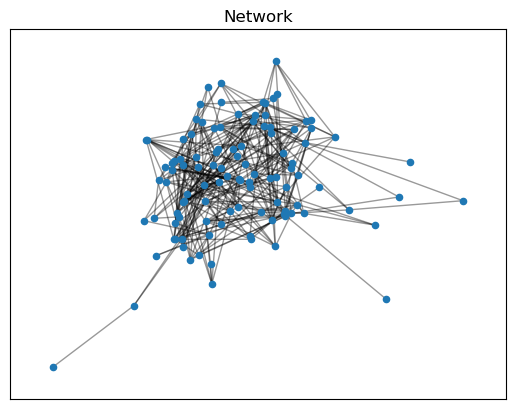

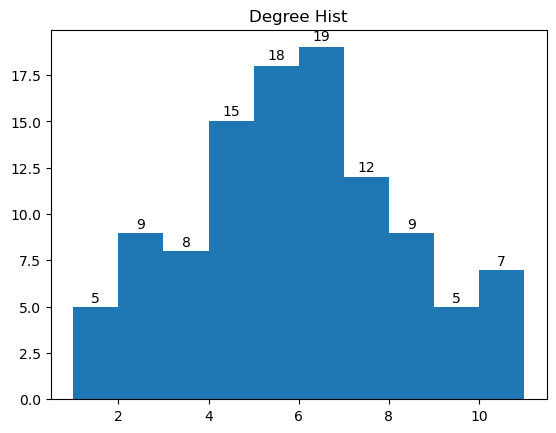

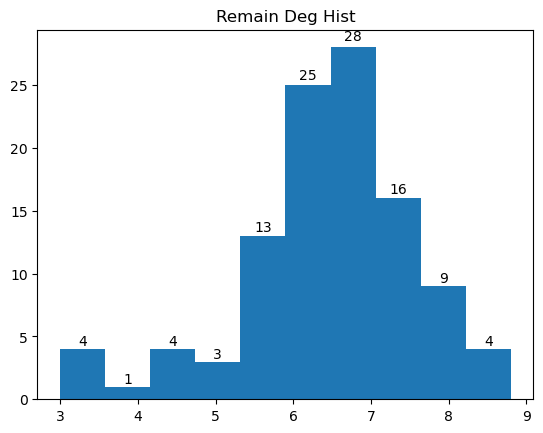

{5: 90, 7: 84, 8: 72, 6: 114, 4: 60, 11: 22, 10: 50, 9: 45, 3: 24, 1: 5, 2: 18}
节点数: 107
边数: 292
平均度: 5.457943925233645
度分布: [0, 5, 9, 8, 15, 18, 19, 12, 9, 5, 5, 2]
余平均度: 6.431096006796943
余度分布: [ 4.  1.  4.  3. 13. 25. 28. 16.  9.  4.]
yu_hist0余度分布: [ 90  84  72 114  60  22  50  45  24   5  18]
yu_hist余度分布: [0.15410959 0.14383562 0.12328767 0.19520548 0.10273973 0.03767123
 0.08561644 0.07705479 0.04109589 0.00856164 0.03082192]
平均路径: 2.9358137894551226
聚类系数: 0.057875820959933114


In [220]:
# 读入邻接表
data = pd.read_csv(r'E:\TangDoc\网络科学\大作业\测试数据\11.csv', header=None)
adj_list = data.to_numpy()
adj_list = [(pair[0], pair[1]) for pair in adj_list]
# 由邻接表构图
g_data = nx.Graph(adj_list)

statistic_graph(g_data)

In [229]:
degree_list = list(g_data.degree())
sorted_data = sorted(degree_list, key=lambda x: x[0])
draw_x = [pair[0] for pair in sorted_data]
draw_y = [pair[1] for pair in sorted_data]

deg_dic = {}
for i in draw_y:
    deg_dic[i] = deg_dic.get(i, 0) + 1

deg_dic = sorted(deg_dic.items(), key=lambda x: x[0])
print(deg_dic)


[(1, 5), (2, 9), (3, 8), (4, 15), (5, 18), (6, 19), (7, 12), (8, 9), (9, 5), (10, 5), (11, 2)]


# Test Gen_0

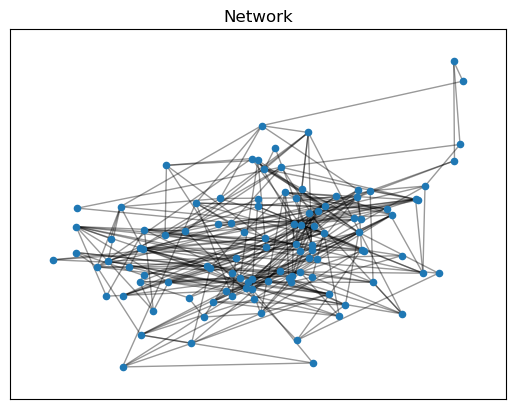

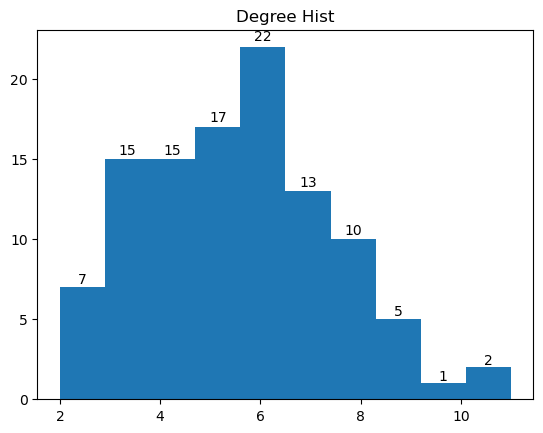

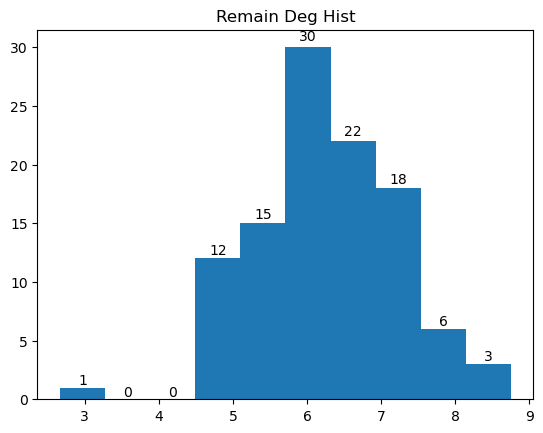

{5: 85, 6: 132, 9: 45, 8: 80, 4: 60, 2: 14, 7: 91, 3: 45, 11: 22, 10: 10}
节点数: 107
边数: 292
平均度: 5.457943925233645
度分布: [0, 0, 7, 15, 15, 17, 22, 13, 10, 5, 1, 2]
余平均度: 6.233158352550876
余度分布: [ 1.  0.  0. 12. 15. 30. 22. 18.  6.  3.]
yu_hist0余度分布: [ 85 132  45  80  60  14  91  45  22  10]
yu_hist余度分布: [0.14554795 0.2260274  0.07705479 0.1369863  0.10273973 0.0239726
 0.15582192 0.07705479 0.03767123 0.01712329]
平均路径: 2.91659319344031
聚类系数: 0.07167806233226792


In [217]:
# n = 105  # node count
# m = 262  # edge count
n = g_data.number_of_nodes()
m = g_data.number_of_edges()
g_model_0 = generate_null_model_0(n, m)
statistic_graph(g_model_0)

In [230]:
degree_list = list(g_model_0.degree())
sorted_data = sorted(degree_list, key=lambda x: x[0])
draw_x = [pair[0] for pair in sorted_data]
draw_y = [pair[1] for pair in sorted_data]

deg_dic = {}
for i in draw_y:
    deg_dic[i] = deg_dic.get(i, 0) + 1

deg_dic = sorted(deg_dic.items(), key=lambda x: x[0])
print(deg_dic)


[(2, 7), (3, 15), (4, 15), (5, 17), (6, 22), (7, 13), (8, 10), (9, 5), (10, 1), (11, 2)]


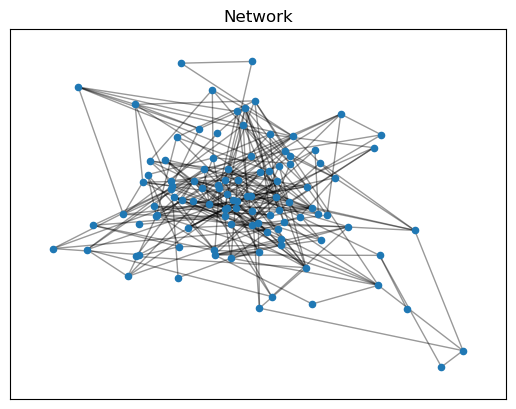

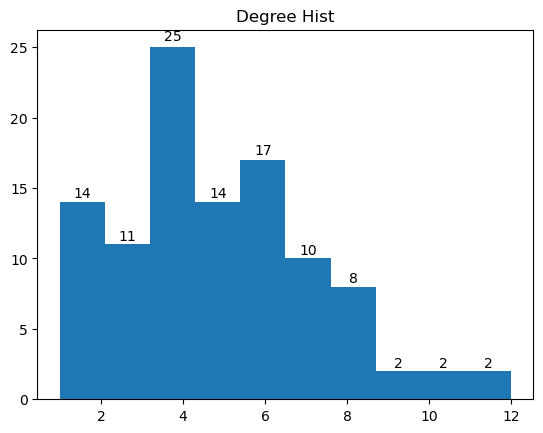

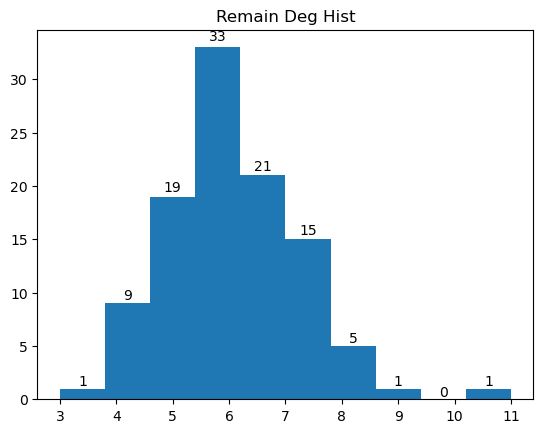

{1: 4, 11: 11, 3: 33, 7: 70, 6: 102, 4: 100, 9: 18, 8: 64, 2: 20, 12: 12, 5: 70, 10: 20}
节点数: 105
边数: 262
平均度: 4.9904761904761905
度分布: [0, 4, 10, 11, 25, 14, 17, 10, 8, 2, 2, 1, 1]
余平均度: 6.042731052016767
余度分布: [ 1.  9. 19. 33. 21. 15.  5.  1.  0.  1.]
yu_hist0余度分布: [  4  11  33  70 102 100  18  64  20  12  70  20]
yu_hist余度分布: [0.00763359 0.02099237 0.0629771  0.13358779 0.19465649 0.19083969
 0.03435115 0.1221374  0.03816794 0.02290076 0.13358779 0.03816794]
平均路径: 3.0448717948717947
聚类系数: 0.03723287294715866


In [200]:
_g_model_0 = _generate_null_model_0(n, m)
statistic_graph(_g_model_0)

# Test Gen_1

In [201]:
g_degree_seq = [val for (node, val) in g_data.degree()]

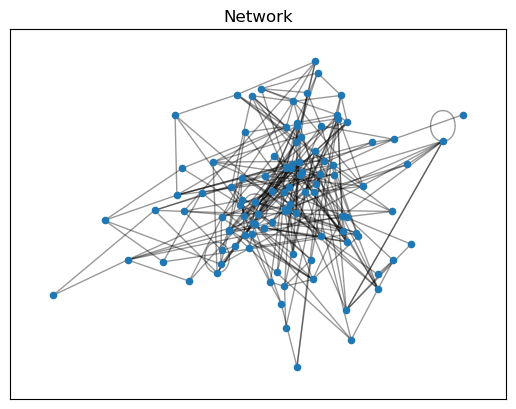

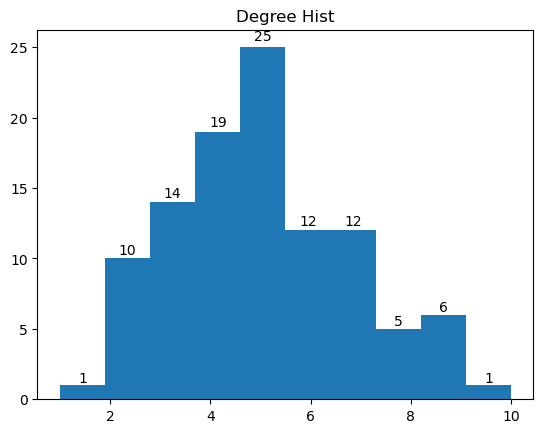

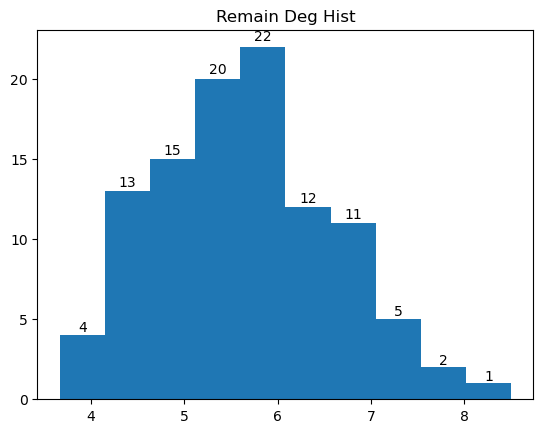

{1: 1, 5: 125, 7: 84, 9: 54, 8: 40, 6: 72, 2: 20, 4: 76, 3: 42, 10: 10}
节点数: 105
边数: 262
平均度: 4.9904761904761905
度分布: [0, 1, 10, 14, 19, 25, 12, 12, 5, 6, 1]
余平均度: 5.6588737717309145
余度分布: [ 4. 13. 15. 20. 22. 12. 11.  5.  2.  1.]
yu_hist0余度分布: [  1 125  84  54  40  72  20  76  42  10]
yu_hist余度分布: [0.0019084  0.23854962 0.16030534 0.10305344 0.07633588 0.13740458
 0.03816794 0.14503817 0.08015267 0.01908397]
平均路径: 3.078021978021978
聚类系数: -1


In [202]:
g_model_1 = generate_null_model_1(g_degree_seq)
statistic_graph(g_model_1)

## Test gen1 by reconn

try:12


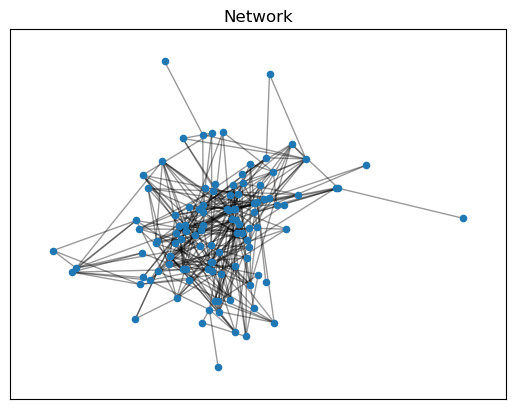

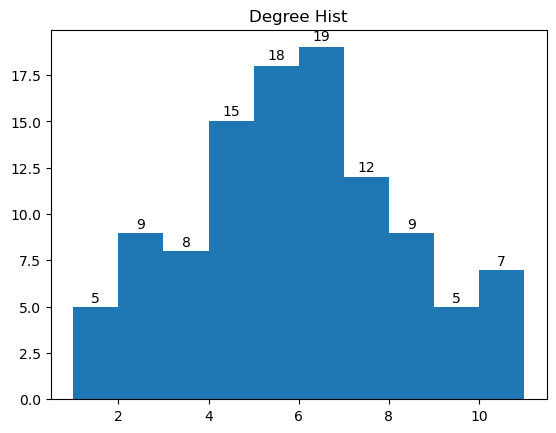

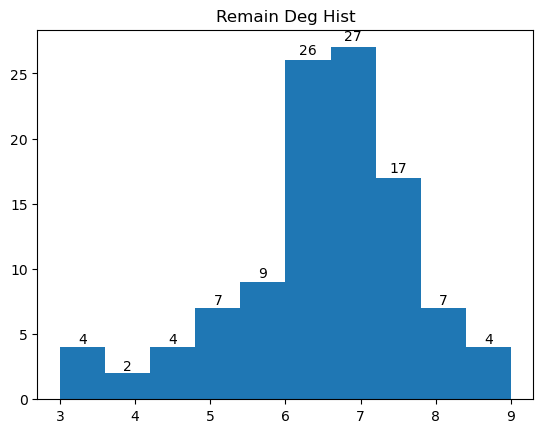

{5: 90, 8: 72, 6: 114, 4: 60, 7: 84, 11: 22, 10: 50, 9: 45, 2: 18, 3: 24, 1: 5}
节点数: 107
边数: 292
平均度: 5.457943925233645
度分布: [0, 5, 9, 8, 15, 18, 19, 12, 9, 5, 5, 2]
余平均度: 6.457371781904493
余度分布: [ 4.  2.  4.  7.  9. 26. 27. 17.  7.  4.]
yu_hist0余度分布: [ 90  72 114  60  84  22  50  45  18  24   5]
yu_hist余度分布: [0.15410959 0.12328767 0.19520548 0.10273973 0.14383562 0.03767123
 0.08561644 0.07705479 0.03082192 0.04109589 0.00856164]
平均路径: 2.9456885910774115
聚类系数: 0.052424107564294484


In [218]:
g_model_1_recon = _generate_null_model_1_recon(g_data.copy())
statistic_graph(g_model_1_recon)

# Test Gen_2

try:1000


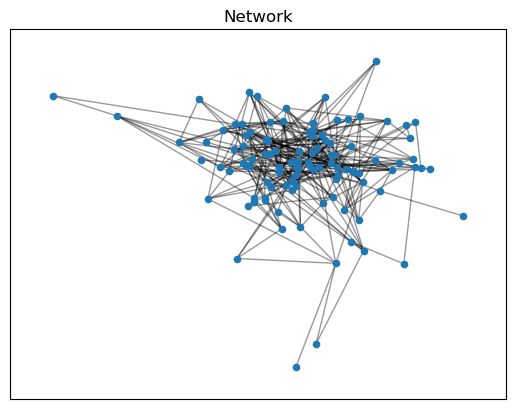

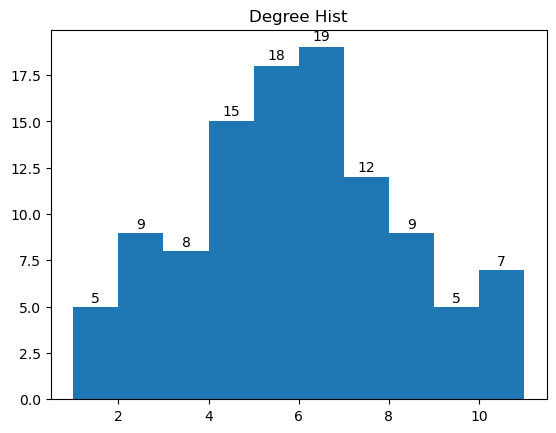

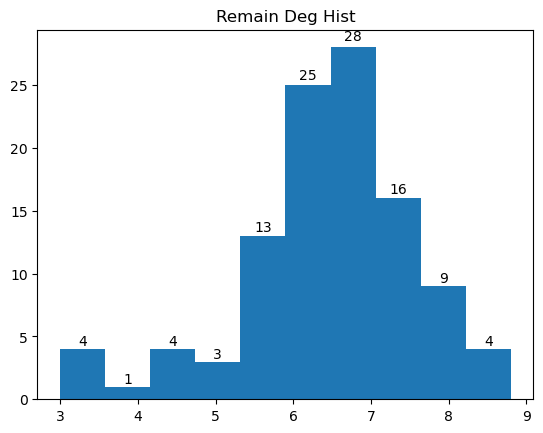

{5: 90, 7: 84, 8: 72, 6: 114, 4: 60, 11: 22, 10: 50, 9: 45, 3: 24, 1: 5, 2: 18}
节点数: 107
边数: 292
平均度: 5.457943925233645
度分布: [0, 5, 9, 8, 15, 18, 19, 12, 9, 5, 5, 2]
余平均度: 6.431096006796943
余度分布: [ 4.  1.  4.  3. 13. 25. 28. 16.  9.  4.]
yu_hist0余度分布: [ 90  84  72 114  60  22  50  45  24   5  18]
yu_hist余度分布: [0.15410959 0.14383562 0.12328767 0.19520548 0.10273973 0.03767123
 0.08561644 0.07705479 0.04109589 0.00856164 0.03082192]
平均路径: 2.9342267677658262
聚类系数: 0.05649620369246539


In [221]:
g_model_2_recon = _generate_null_model_2_recon(g_data.copy())
statistic_graph(g_model_2_recon)